## 3.1-Implement Orthogonal Matching Pursuit

In [2]:
from sklearn . datasets import load_digits
import numpy as np
from sklearn import model_selection
import matplotlib . pyplot as plt
from sklearn.preprocessing import StandardScaler
import bisect

In [3]:
def omp_regression(X, y, T):
    """

    Args:
        X (torch tensor): N x D
        y (torch tensor): N x 1 
        T (integer): # of iterations

    Returns:
        Beta (ndarray): regression parameters, D x 1 
    """
    X = np.array(X)
    A = []
    B = np.array(range(X.shape[1]))
    r = y # initialization of residual
    Beta = np.zeros((X.shape[1], 1)) # initialization of regression parameters
    for t in range(T):
        j = np.argmax(np.abs(X.T @ r)) # index of the largest correlation
        B = B[B != j] # remove the index from the candidate set
        bisect.insort(A, j) # add the index to the active set
        X_active = X[:, A] # active columns of X
        beta_new = Beta[:, t] # initialization of the new regression parameter
        if np.linalg.det(X_active.T @ X_active) == 0:
            break # if the matrix is singular, break
        beta_new[A] = np.linalg.inv(X_active.T @ X_active) @ X_active.T @ y # ols solution
        Beta = np.c_[Beta, beta_new] # add the new regression parameter
        r = y - X_active @ Beta[A, t] # update the residual
    return Beta

<div style="color: green; font-weight: bold">Comment for cell above</div>
beta should be np.zeros((D, T)), here it is np.zeros((D, 1))

other than that it seems correct to me.

## 3.2-Classification with sparse LDA

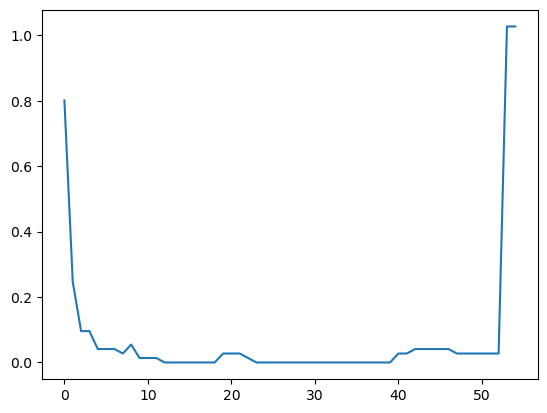

In [4]:
#Loading digits
digits = load_digits ()
data = digits ['data']
target = digits ["target"]

#Keep only '3' and '9'
mask = np.logical_or(target == 3, target == 9)
data = data[mask]  # / data.max()
target = target[mask]

#Change target values to '1' and '-1'
target[target == 9] = -1
target[target == 3] = 1

#Split training and test set
X_all = data
y_all = target
X_train, X_test, y_train, y_test = model_selection.train_test_split(
                                    X_all, y_all, test_size=0.4 , random_state=0)

#Compute the error rate with a very big 
T = 64
Beta = omp_regression(X_train, y_train, T)
error_rate = []
for t in range(Beta[0].shape[0]):
    error_rate.append(np.mean(np.abs(np.sign(X_test@Beta[:,t]) - y_test)))
plt.plot(error_rate)

<div style="color: green; font-weight: bold">Comment for cell above</div>
Seems Correct! However, I am not sure, where that spike in the error is coming from.

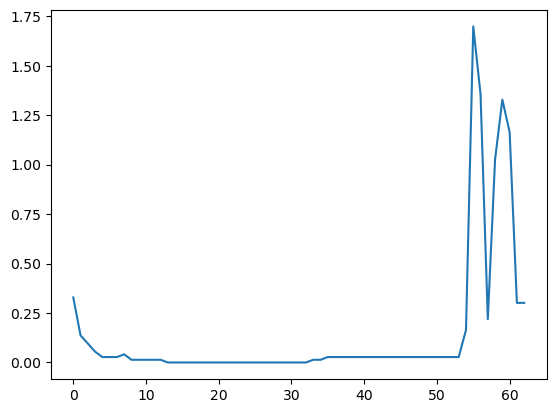

In [10]:
#Standardization
scaler = StandardScaler()

X_train_2d = [[x] for x in X_train]
X_test_2d = [[x] for x in X_test]

scaler.fit(X_train)
scaler.fit(X_test)

X_train_standardized = scaler.transform(X_train)
X_test_standardized = scaler.transform(X_test)

#Compute the error rate with the standardization
T = 64
BetaStd = omp_regression(X_train_standardized, y_train, T)
error_rate = []
for t in range(BetaStd[0].shape[0]):
    error_rate.append(np.mean(np.abs(np.sign(X_test_standardized @ BetaStd[:,t]) - y_test)))
plt.plot(error_rate)

Standardization doesn't look particularly beneficial in terms of reducing the error rate faster

<div style="color: green; font-weight: bold">Comment for cell above</div>
Seems Correct! However, I am not sure, where that spike in the error is coming from.

Active pixels for unstandardized data


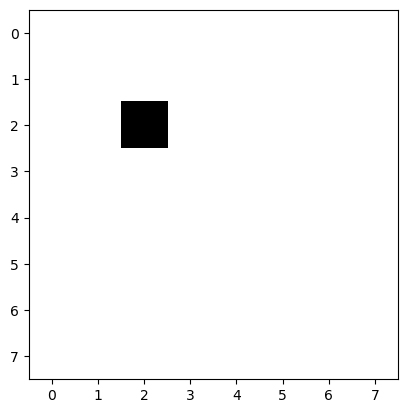

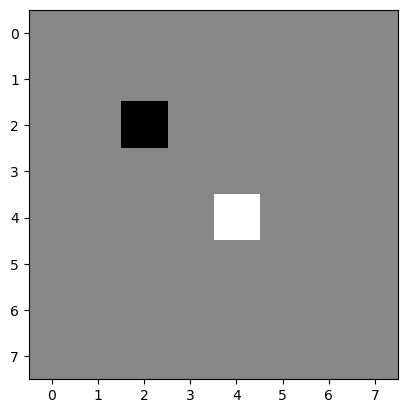

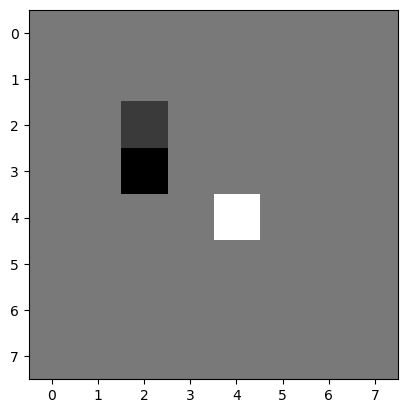

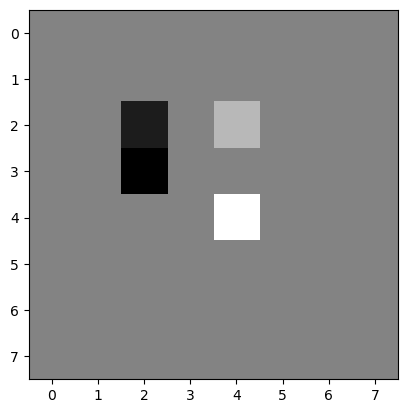

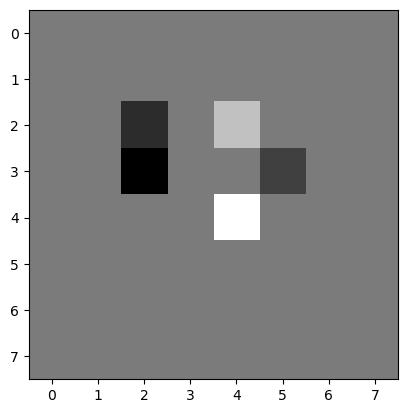

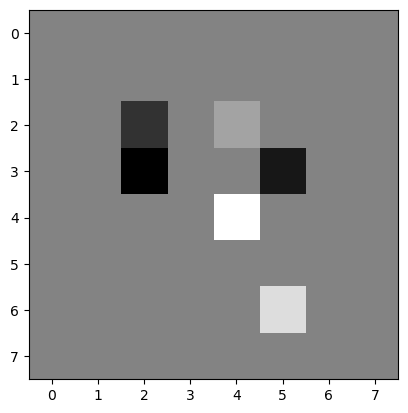

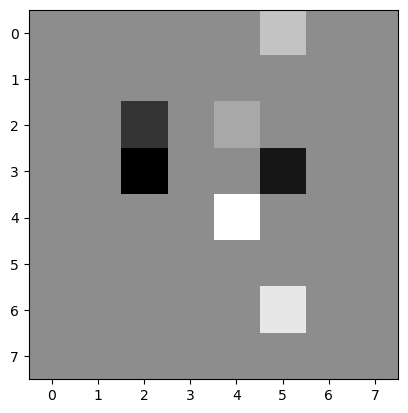

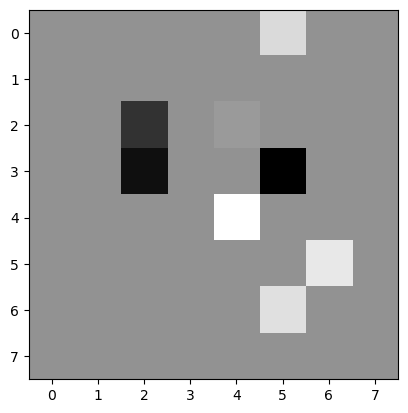

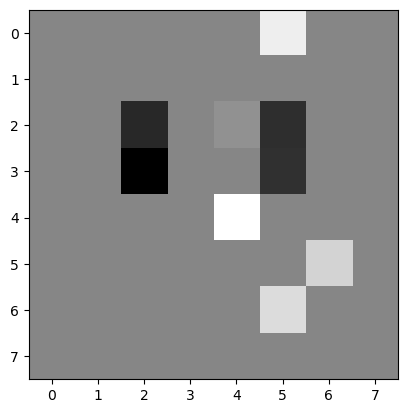

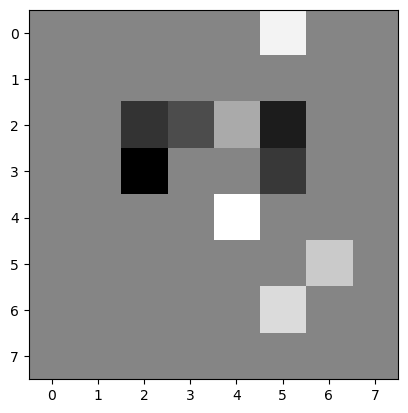

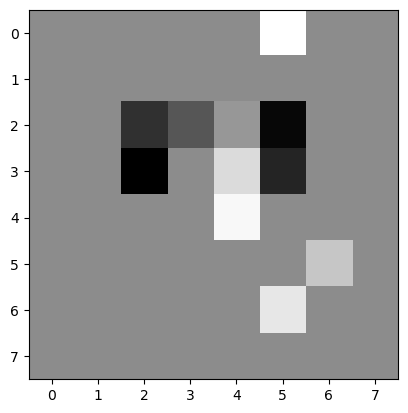

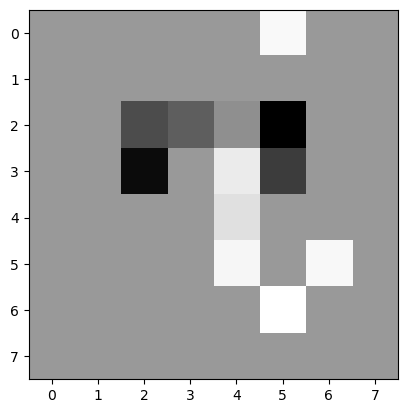

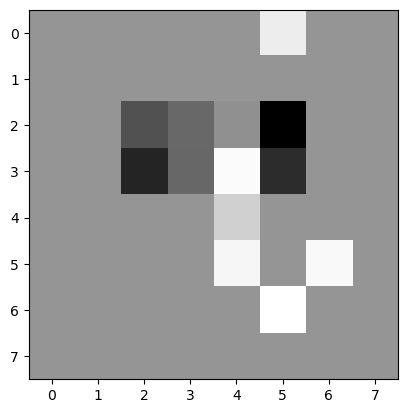

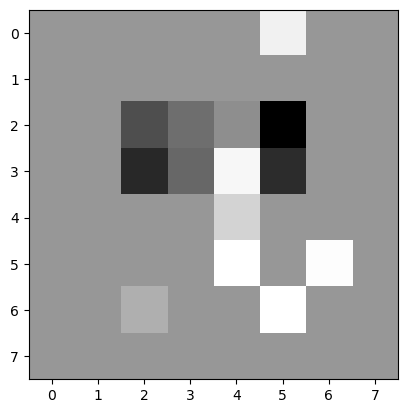

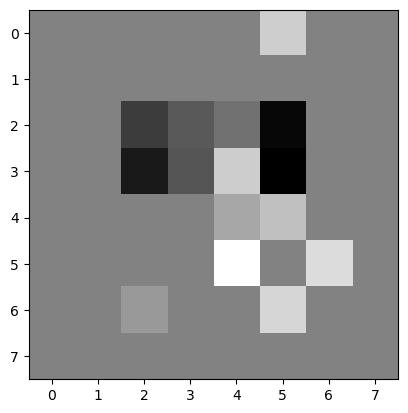

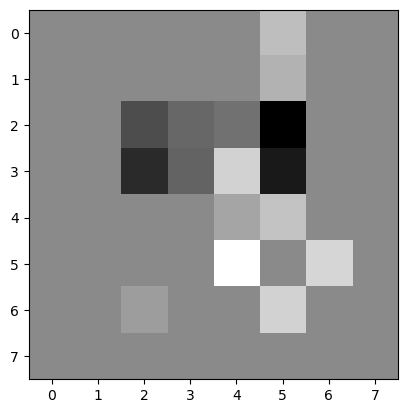

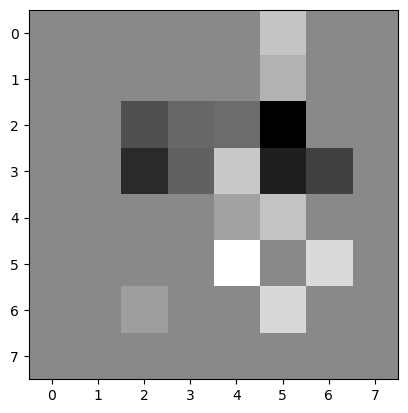

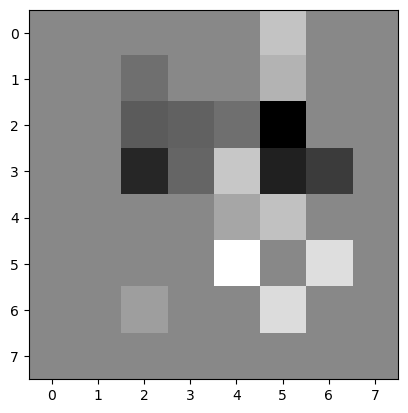

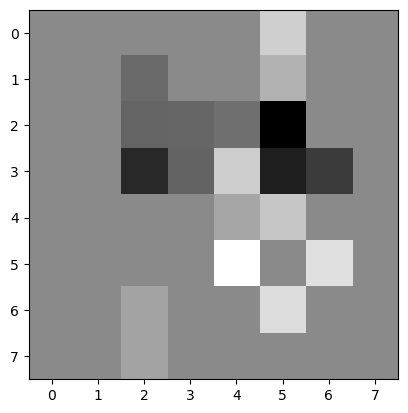

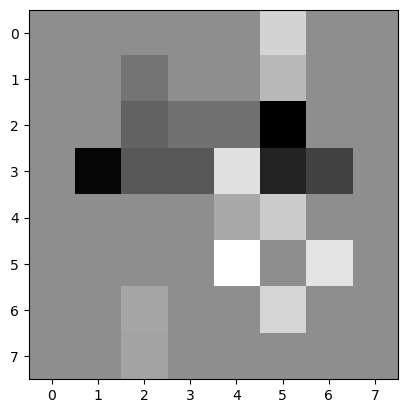

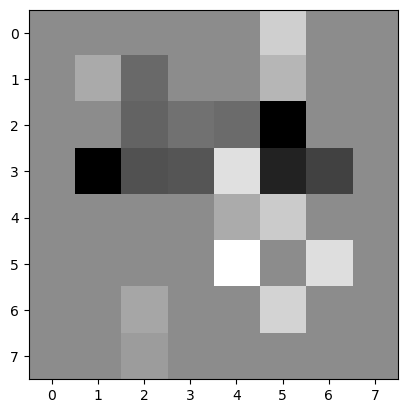

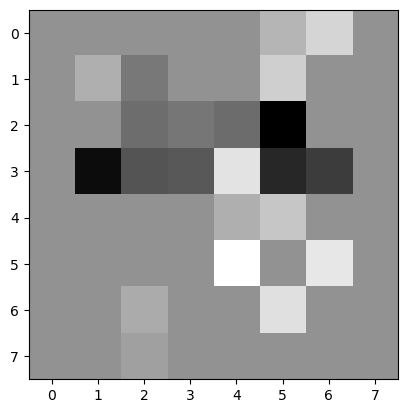

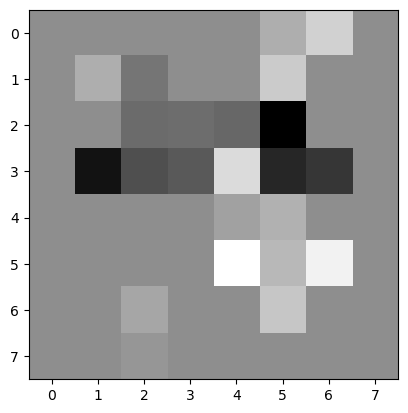

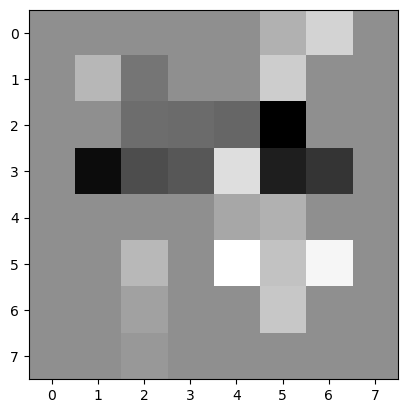

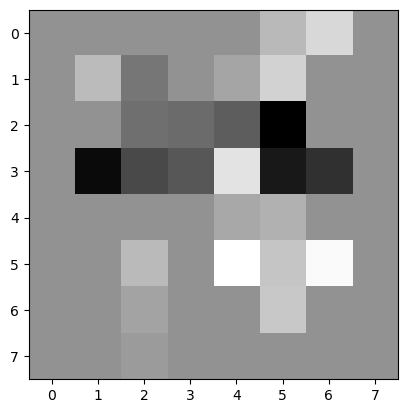

Beta for unstandardized data
Total number of 3 prediction results with unstd data 0.0
Total number of 3 prediction results with unstd data 64.0
Total number of 3 prediction results with unstd data 67.0
Total number of 3 prediction results with unstd data 67.0
Total number of 3 prediction results with unstd data 69.0
Total number of 3 prediction results with unstd data 69.0
Total number of 3 prediction results with unstd data 69.0
Total number of 3 prediction results with unstd data 70.0
Total number of 3 prediction results with unstd data 68.0
Total number of 3 prediction results with unstd data 71.0
Total number of 3 prediction results with unstd data 71.0
Total number of 3 prediction results with unstd data 71.0
Total number of 3 prediction results with unstd data 72.0
Total number of 3 prediction results with unstd data 72.0
Total number of 3 prediction results with unstd data 72.0
Total number of 3 prediction results with unstd data 72.0
Total number of 3 prediction results with un

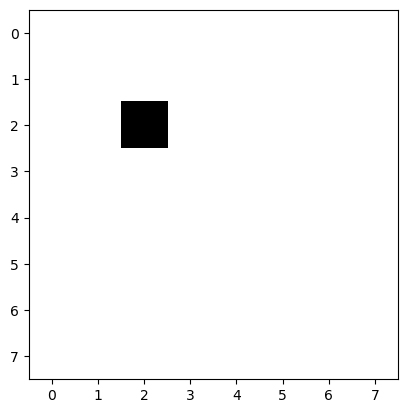

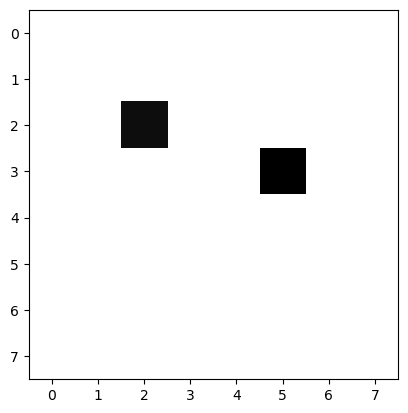

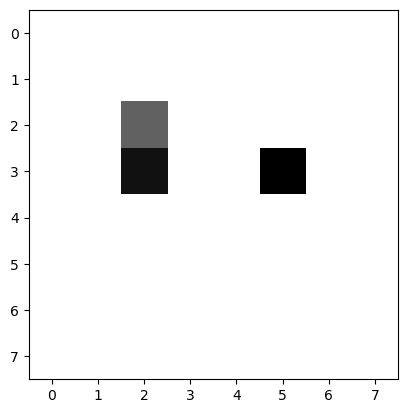

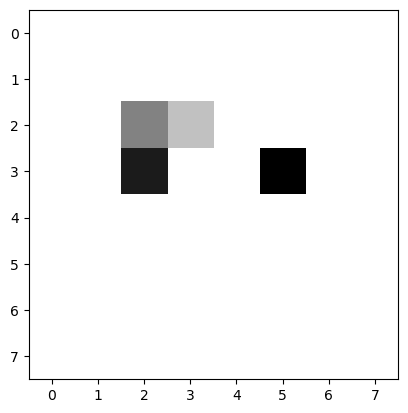

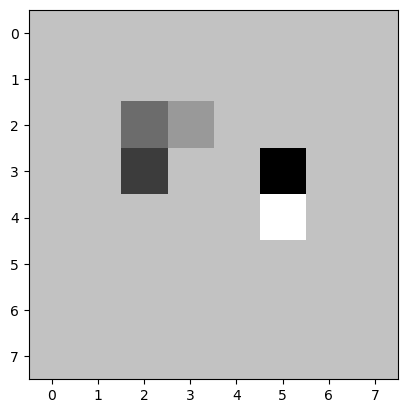

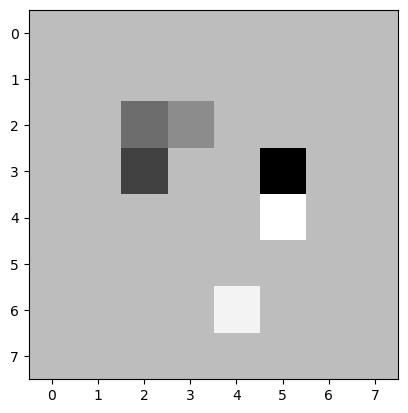

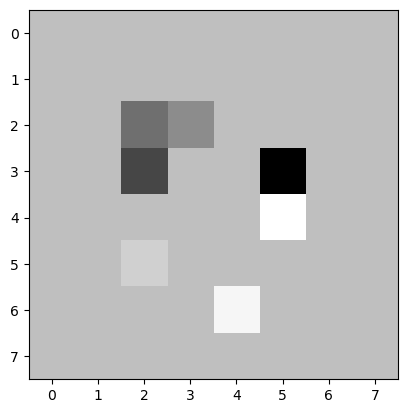

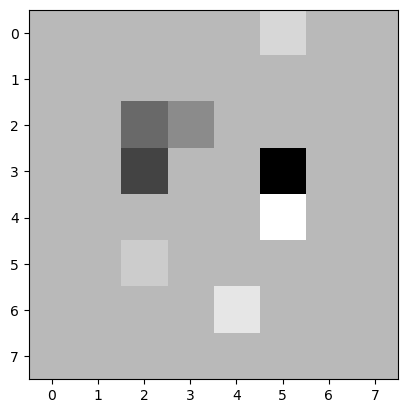

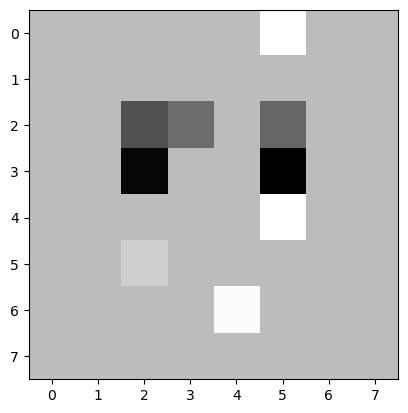

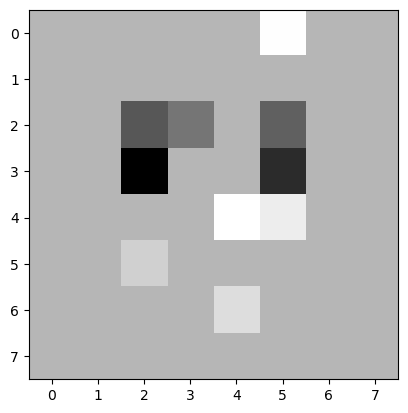

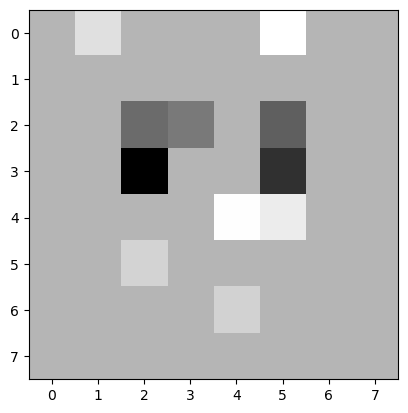

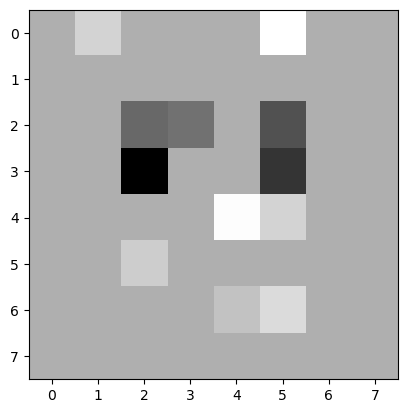

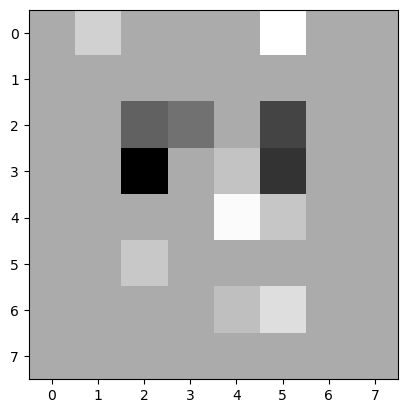

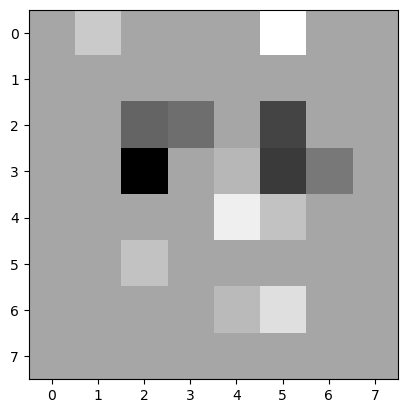

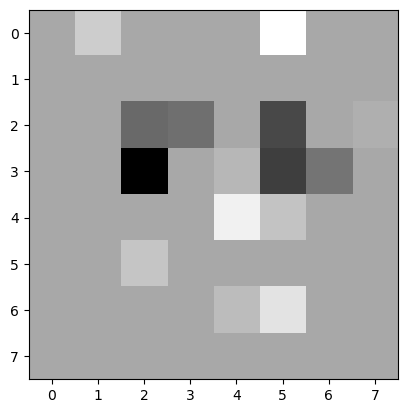

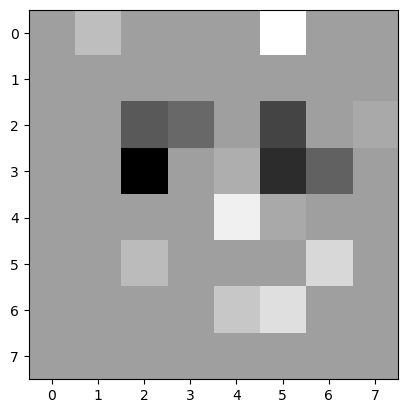

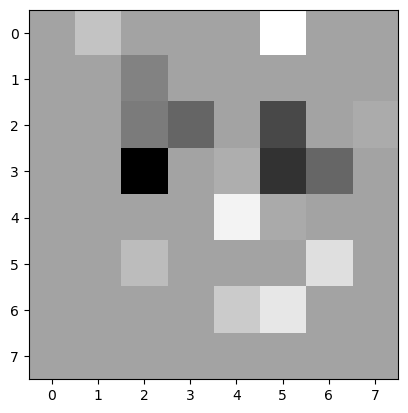

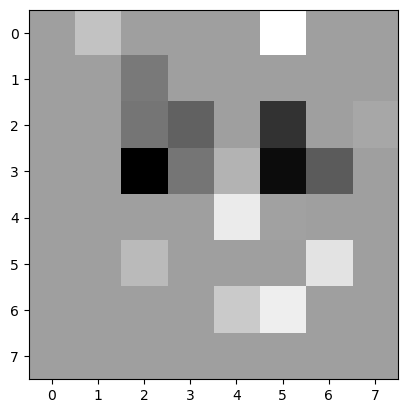

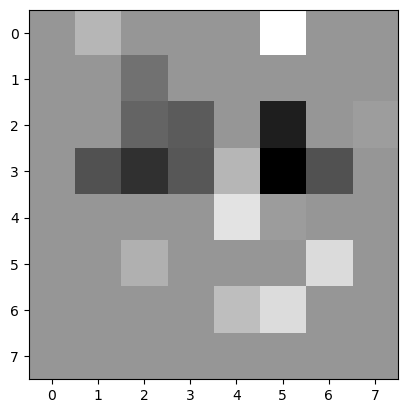

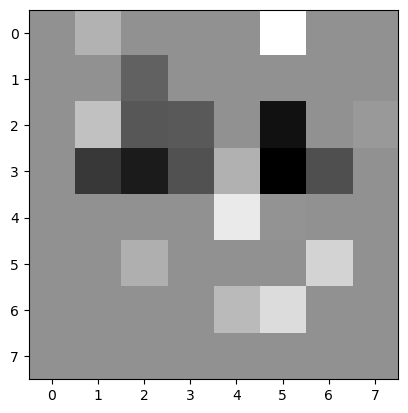

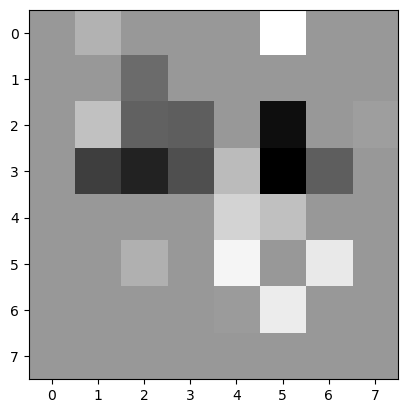

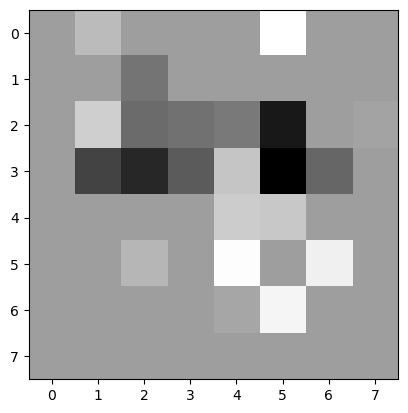

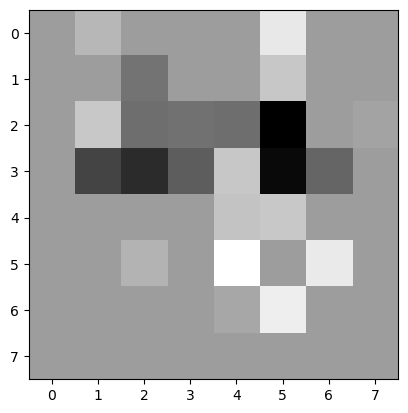

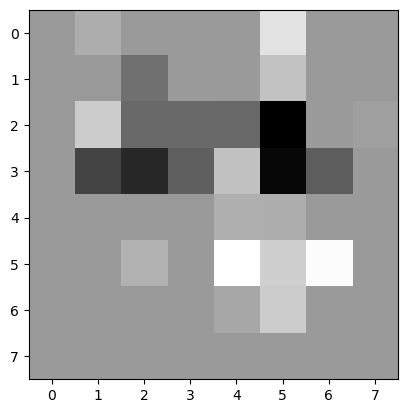

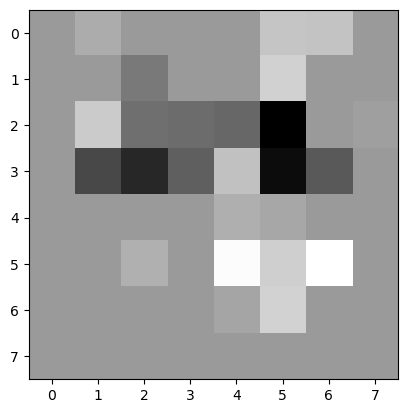

Beta for standardized data
Total number of 3 prediction results with std data 0.0
Total number of 3 prediction results with std data 0.0
Total number of 3 prediction results with std data 0.0
Total number of 3 prediction results with std data 0.0
Total number of 3 prediction results with std data 7.0
Total number of 3 prediction results with std data 23.0
Total number of 3 prediction results with std data 23.0
Total number of 3 prediction results with std data 33.0
Total number of 3 prediction results with std data 13.0
Total number of 3 prediction results with std data 41.0
Total number of 3 prediction results with std data 42.0
Total number of 3 prediction results with std data 54.0
Total number of 3 prediction results with std data 59.0
Total number of 3 prediction results with std data 60.0
Total number of 3 prediction results with std data 60.0
Total number of 3 prediction results with std data 66.0
Total number of 3 prediction results with std data 60.0
Total number of 3 predicti

In [11]:
# we select up to 25 iterations since the error rate is either flat or increasing after around 10 iterations
# we could have settled for less but we thought it would have been nice to see more pixels in the visualization later 

# visualising active pixels
pixels = 25
print("Active pixels for unstandardized data")
for t in range(pixels):
    plt.imshow(Beta[:, t].reshape(8,8), cmap = "gray", label = "t = " + str(t))
    plt.show()

# comparing the effect of new pixels on 3 selection 
print("Beta for unstandardized data")
for t in range(pixels):
    y = np.sign(X_test @ Beta[:, t])
    print("Total number of 3 prediction results with unstd data", np.sum(y[y == 1]))
    
print("Active pixels for standardized data")
for t in range(pixels):
    plt.imshow(BetaStd[:, t].reshape(8,8), cmap = "gray",  label = "t = " + str(t))
    plt.show()
    
print("Beta for standardized data")
for t in range(pixels):
    yStd = np.sign(X_test @ BetaStd[:, t])
    print("Total number of 3 prediction results with std data", np.sum(yStd[yStd == 1]))



It's hard to say wether we select the same pixel in the first exercise as we didn't hand picked them but instead we created two methods for computing them. However, we know for sure that we made some mistakes in those methods resulting in a pretty bad feature selection so we have no doubt this method found some better results. 

<div style="color: green; font-weight: bold">Comment for cell above</div>
Seems Correct! However, the vote for which class is not explained.